Condemned & Dead-End Properties Dataset & Analysis - Susan Agbokah



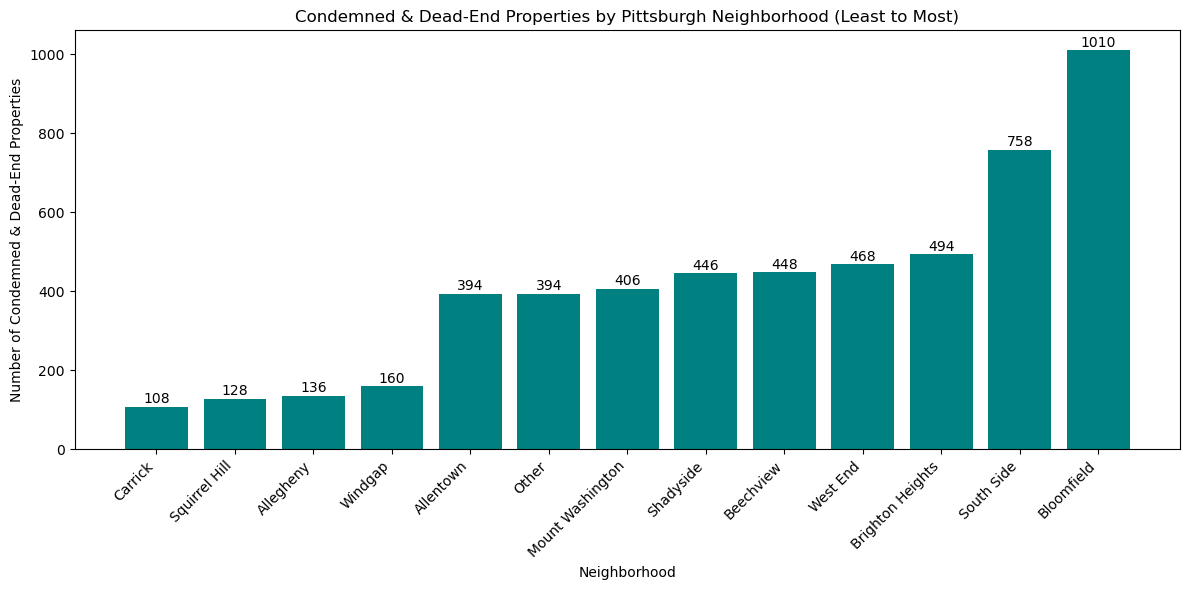

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Reading CSV file into notebook
property = pd.read_csv("Condemned_Properties.csv")

#Removing blank rows and rows with 'no primary address'
property = property[property['address'].notna()]
property = property[property['address'] != "No primary address specified"]

#Using split function to extract zip code from valid addresses
property['Zip'] = property['address'].apply(lambda x: x.split(',')[-1].strip())

#Creating a dictionary of top neighborhoods in pgh -> zip code:neighborhood
zip_to_neighborhood = {
    
    '15221': 'Allegheny','15213': 'Oakland', '15224': 'Squirrel Hill', '15206': 'Shadyside',
    '15212': 'South Side', '15217': 'East Liberty', '15232': 'Homewood',
    '15203': 'Carrick', '15210': 'Bloomfield', '15222': 'Downtown',
    '15214': 'Allentown', '15216': 'Brookline', '15218': 'Crafton Heights',
    '15219': 'West End', '15220': 'Windgap', '15201': 'North Shore',
    '15202': 'Strip District', '15204': 'Mount Washington',
    '15205': 'Point Breeze', '15207': 'Beechview', '15208': 'Brighton Heights',
    '15211': 'Mount Washington', '15236': 'Upper Hill'
}

#Keeping zip codes that match with zip codes from our data
property = property[property['Zip'].isin(zip_to_neighborhood.keys())]

#Creating a column for the properties with their corresponding properties
property['Neighborhood'] = property['Zip'].map(zip_to_neighborhood)

#Counting properties per neighborhood
neighborhood_counts = property['Neighborhood'].value_counts()

#Filtering out small neighborhoods (<10 properties) 
#-> want to focus on areas with more data
neighborhood_counts = neighborhood_counts[neighborhood_counts >= 10]

#Creating var. for number of neighborhoods shown in chart
top_count = 12

#Combining smaller neighborhoods into "Other" -> ensures data
#is still represented, but makes chart look more presentable
top = neighborhood_counts.sort_values(ascending=False).head(top_count)
other = neighborhood_counts.sort_values(ascending=False).tail(len(neighborhood_counts) - top_count).sum()
top['Other'] = other

#Sorting bars from smallest to largest number of properties
final_counts = top.sort_values(ascending=True)

#Creating vertical bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(final_counts.index, final_counts.values, color='teal')

#Adding labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,   
        height + 1,                          
        str(int(height)),                    
        ha='center', va='bottom', fontsize=10
    )

#Adding titles and labels for axis and title 
plt.title("Condemned & Dead-End Properties by Pittsburgh Neighborhood (Least to Most)")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Condemned & Dead-End Properties")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




Submetric: Unowned/Vacant properties

Dataset from WPRDC: Condemed & Dead-End Properties (CSV File, 4,000+ entries)

Condemned & Dead-End Properties are buildings that the city of Pittsburgh has labeled unsafe or beyond repair, so they are basically vacant properties. Also, by law they cannot be lived in until they are fixed or torn down.

Information found: Addresses(zip code), owner, property type, latest inspection result

Group metric: Quality of life

How it connects: This chart shows how many unsafe or abandoned buildings exist in each neighborhood. Higher counts of these properties indicate worse housing conditions and lower neighborhood safety which directly impacts residents’ quality of life.
